<img src="../figs/holberton_logo.png" alt="logo" width="500"/>

# Week 1. Introduction to Machine Learning 🚀

## 🛳️ Machine Learning Fundamentals with the Titanic Dataset

Ever pondered if Jack could've made it out alive? 

Then, let's try to explore fundamentals of machine learning by building a simple model that can help us predict the survival of passengers in the famous Titanic ship. This project is best enjoyed with some [background music](https://www.youtube.com/watch?v=F2RnxZnubCM)


Let's set sail! 🏴‍☠️

### Step 1: Load the Data 📦

First, we'll load the Titanic dataset using `Seaborn` and take a peek at what we're working with.
We start by importing essential libraries: 

- `pandas` for data manipulation
- `seaborn` for loading the Titanic dataset and visualization
- `sklearn` for machine learning models and evaluation metrics
- `matplotlib` for plotting. 

We then load the Titanic dataset using `Seaborn` and display its first few rows to understand the structure and contents of the data.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Display the first few rows
titanic_df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Step 2: Analyze and Preprocess the Data 🔍

#### Check for missing values

We check for missing values using `titanic_df.isnull().sum()` to identify any gaps in our dataset that need to be addressed. **Missing values can lead to errors or biases** in our model, so it's crucial to detect and handle them before proceeding with analysis or model training.

In [2]:
# Check for missing values
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

The summary indicates the number of missing values in each column of the Titanic dataset. Critical columns like '`age`' and '`embarked`' have `177` and `2` missing values respectively, which need to be addressed. 
Columns like '`deck`' have a high number of missing values (`688`)

#### Handle Missing Values

To handle missing values, we 

- Fill the missing '`age`' values with the median, ensuring that the dataset remains representative without being skewed by outliers. 
- The '`embarked`' column's missing values are filled with the mode, the most common value, to maintain consistency. 
- We drop columns with excessive missing values or irrelevant data to simplify the dataset. 
- Categorical variables are converted to numerical ones to make them usable for machine learning algorithms. 

Finally, we check the cleaned data to ensure these preprocessing steps were applied correctly.

In [3]:
# Fill missing values in 'age' with the median
titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)

# Fill missing values in 'embarked' with the mode
titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0], inplace=True)

# Drop columns we won't use for this model
titanic_df.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'parch', 'sibsp'], inplace=True)

# Convert categorical variables to numerical ones
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})
titanic_df = pd.get_dummies(titanic_df, columns=['embarked'], drop_first=True)

# Check the cleaned data
titanic_df.head()


,survived,pclass,sex,age,fare,alone,embarked_Q,embarked_S
0,0,3,0,22.0,7.2500,False,False,True
1,1,1,1,38.0,71.2833,False,False,False
2,1,3,1,26.0,7.9250,True,False,True
3,1,1,1,35.0,53.1000,False,False,True
4,0,3,0,35.0,8.0500,True,False,True


### Step 3: Prepare for Train-Test Split 🧹

By dividing the dataset into training and testing sets, we can **train the model on one subset** (training set) and **evaluate its performance on another subset** (testing set) that the model hasn't seen before. 

**This helps in assessing how well the model generalizes to new, unseen data.**

Technically, we define our features (`X`) by dropping the target column '`survived`' from the dataset, and the target (`y`) as the 'survived' column. 

We then use `train_test_split` from `sklearn` to split the data into training and testing sets. Here, `80%` of the data is used for training, and `20%` is reserved for testing. The `random_state=42` ensures reproducibility of the split

In [4]:
# Define features (X) and target (y)
X = titanic_df.drop(columns='survived')
y = titanic_df['survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 7), (179, 7), (712,), (179,))

### Step 4: Apply Logistic Regression and Decision Tree 🌳

#### Logistic Regression

##### How Logistic Regression Works:

Logistic regression is a **statistical method for binary classification** that models the probability of a binary outcome based on one or more predictor variables. It uses the logistic function to convert linear combinations of features into a probability score between `0` and `1`. The model then applies a threshold (usually `0.5`) to decide the class label.

<img src="../figs/1_introtoml/logreg.png" alt="logo" width="500"/>


#####  Why It Is Useful in This Context:

In the context of the Titanic dataset, logistic regression is useful because it **provides a straightforward way to predict whether a passenger survived** (binary outcome: survived or not survived) based on features such as age, fare, sex, etc. Its interpretability and efficiency make it suitable for this binary classification task.

##### What We Aim to Achieve:

By training a logistic regression model, we aim to predict the survival of passengers based on their features, evaluate the model's accuracy, and understand the significance of different features in predicting survival.

<img src="../figs/1_introtoml/logregclassification.png" alt="logo" width="500"/>


In [5]:
# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_log_reg = log_reg.predict(X_test)


#### Understand Feature Importance

Visualizing feature importance in logistic regression helps us **understand which features have the most significant impact on the model's predictions**. By plotting the coefficients of the features, we can see the magnitude and direction of each feature's influence on the outcome (survival).

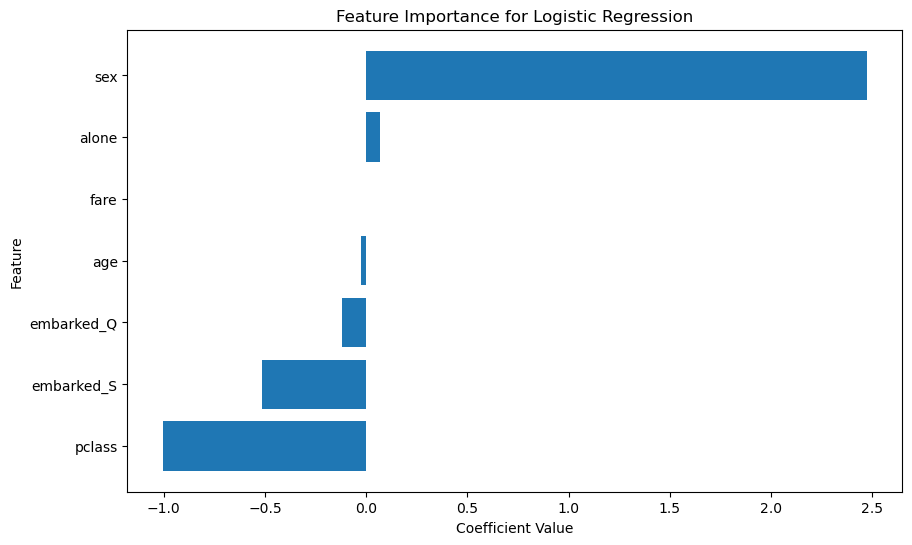

In [6]:
# Visualize feature importance for logistic regression
plt.figure(figsize=(10, 6))
coefficients = log_reg.coef_[0]
sorted_indices = coefficients.argsort()
plt.barh(X.columns[sorted_indices], coefficients[sorted_indices])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance for Logistic Regression")
plt.show()


#### Decision Tree

##### How Decision Tree Works:

A decision tree is a machine learning algorithm used for both classification and regression tasks. It works by **splitting the dataset into subsets based on the value of input features**. This splitting is done recursively, creating branches until a decision node (leaf) is reached. **Each internal node represents a feature**, each **branch represents a decision rule**, and **each leaf node represents the outcome**.

##### Why It Is Useful in This Context:

In the context of the Titanic dataset, a decision tree is useful because it can capture complex interactions between features and is **easy to interpret**. It visually shows the decision-making process, which helps in understanding how different features contribute to the survival prediction.

#####  What We Aim to Achieve:

By training a decision tree model, we aim to predict the survival of passengers based on their features, evaluate the model's accuracy, and gain insights into the decision-making process of the model through visualization

In [7]:
# Train decision tree model
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

# Predict on test data
y_pred_tree = tree_clf.predict(X_test)


#### Visualize the Decision Tree 🌳🔍
Time to visualize our decision tree and understand how our model behaves.

Visualizing the decision tree provides a detailed look at how the model makes predictions. It shows the structure of the tree, including how the dataset is split at each node based on feature values, and the decisions made at each node

This visualization provides a comprehensive view of the decision-making process of the tree model. It shows:

- Which features are used for splitting the data at each node.
- The conditions for these splits.
- The class predictions at each leaf node.
- The flow of decisions from the root to the leaves.

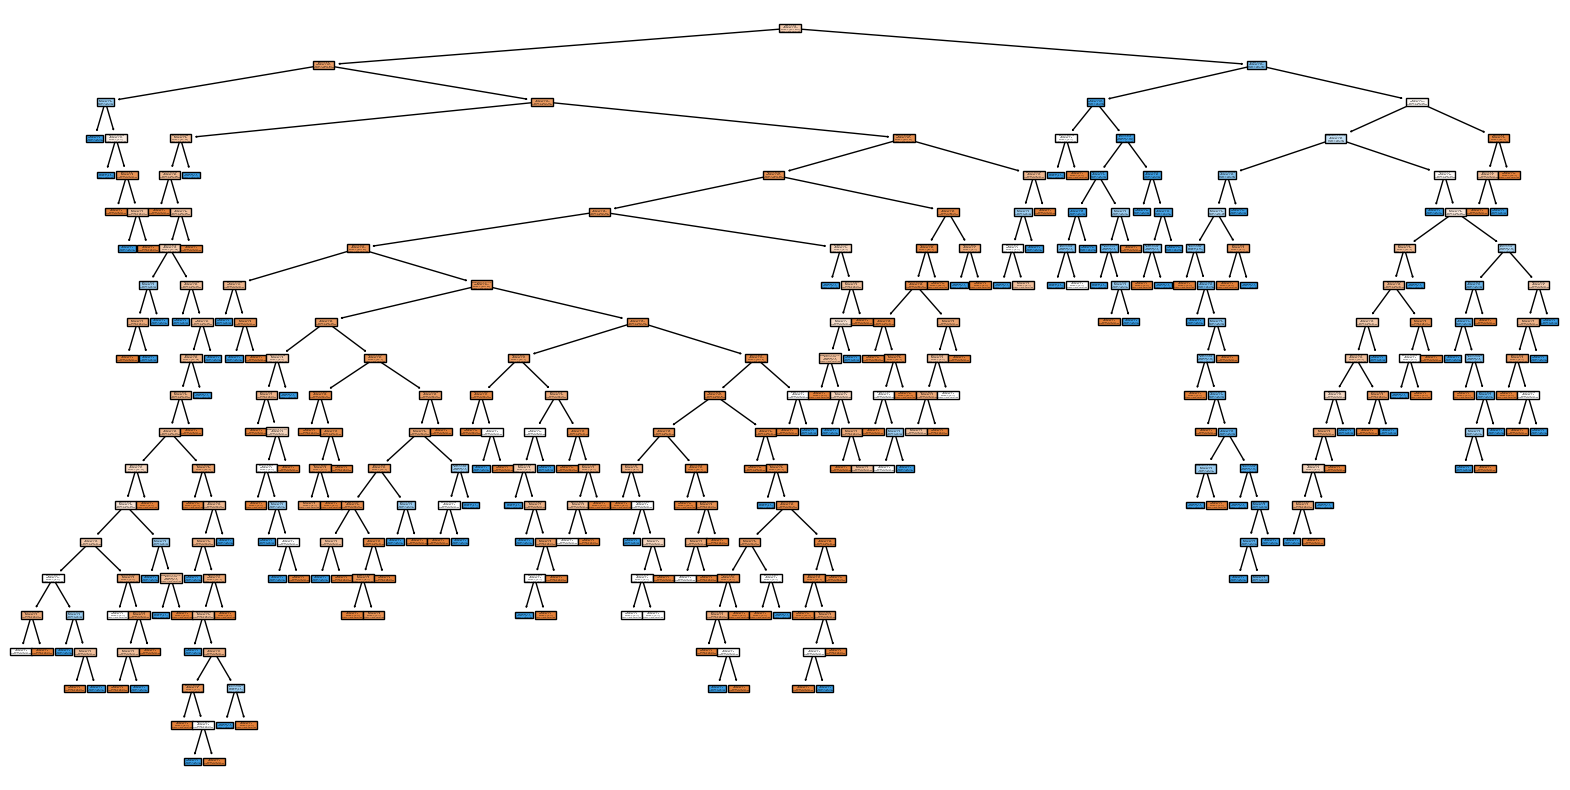

In [8]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=X.columns.tolist(), class_names=['Not Survived', 'Survived'])

# Save the plot with high resolution
plt.savefig("decision_tree_high_res.png", dpi=300)
plt.show()


### Step 6: Evaluate the Models 📊
Time to see how our models performed! We'll use a confusion matrix to evaluate the results.

#### Accuracy Score

Accuracy is a metric used to evaluate the performance of a classification model. **It measures the proportion of correctly classified instances out of the total instances**. In the context of logistic regression, accuracy tells us how often the model correctly predicts the survival status of passengers.

In [9]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for logistic regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy for Logistic Regression:", accuracy_log_reg)

Accuracy for Logistic Regression: 0.7988826815642458


The accuracy score for logistic regression is approximately `0.799`. This means that the model correctly predicts the survival status of passengers about `79.9%` of the time.

#### Confusion Matrix

We generate and visualize the confusion matrix for logistic regression to understand the model's performance in predicting survival outcomes.

The confusion matrix provides a detailed breakdown of the model's predictions. It shows the number of true positives, true negatives, false positives, and false negatives, allowing us to evaluate the model's accuracy and identify any potential issues, such as misclassifications

Confusion Matrix for Logistic Regression:
 [[88 17]
 [19 55]]


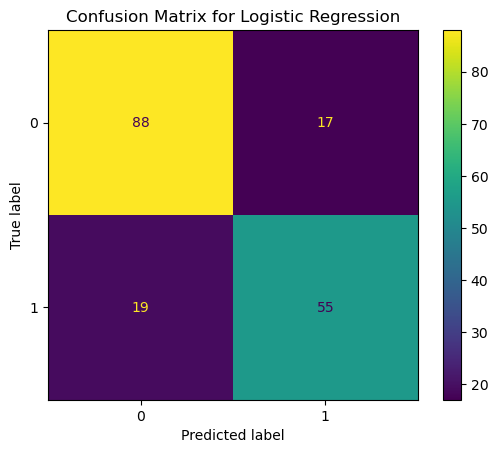

In [10]:
# Confusion matrix for logistic regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix for Logistic Regression:\n", cm_log_reg)

# Plot confusion matrix
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp_log_reg.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


The confusion matrix for logistic regression shows:
    
- **True Positives (TP)**: This refers to the number of instances where the model correctly predicted that a passenger survived (positive class) and the actual outcome was also survival. 

- **True Negatives (TN)**: This indicates the number of instances where the model correctly predicted that a passenger did not survive (negative class) and the actual outcome was also not survival. 

- **False Positives (FP)**: These are the instances where the model incorrectly predicted that a passenger survived (positive class), but the actual outcome was non-survival. 

- **False Negatives (FN)**: This represents the number of instances where the model incorrectly predicted that a passenger did not survive (negative class), but the actual outcome was survival. 

#### Accuracy Score and Confusion Matrix for Decision Tree

Similarly, we compute the accuracy score for the decision tree model to assess its performance in predicting survival outcomes

The accuracy score for the decision tree model is approximately `0.782`. This means that the decision tree model correctly predicts the survival status of passengers about `78.2%` of the time.

When comparing the accuracy scores of the logistic regression and decision tree models, we observe a similar behavior, though strictly speaking the logistic regression model performs slightly better in terms of accuracy.

In [11]:
# Calculate accuracy for decision tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy for Decision Tree:", accuracy_tree)

Accuracy for Decision Tree: 0.776536312849162


Confusion Matrix for Decision Tree:
 [[83 22]
 [18 56]]


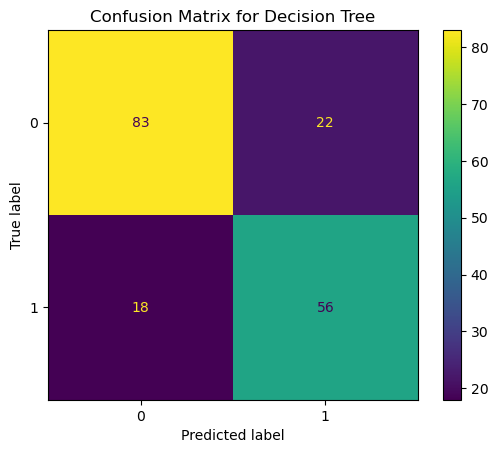

In [12]:
# Confusion matrix for decision tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix for Decision Tree:\n", cm_tree)

# Plot confusion matrix
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp_tree.plot()
plt.title("Confusion Matrix for Decision Tree")
plt.show()


### Conclusion 🎉

And there you have it! We've navigated through the Titanic dataset, preprocessed it, and applied logistic regression and decision tree models to predict passenger survival. We also visualized our decision tree and saved it as a high-resolution image. Not only did we analyze our predictions with confusion matrices, but we also had a bit of fun along the way! 🌊🛳️

Feel free to experiment further and explore more about model tuning and feature engineering. 

#### Happy coding!